In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn') # pretty matplotlib plots

# 7.8.1 Polynomial Regression and Step Functions

In [2]:
wage = pd.read_csv('datasets/Wage.csv', index_col=0)
wage

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
376662,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
450601,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
377954,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
228963,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
81404,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


In [3]:
wage.iloc[:, 2:10] = wage.iloc[:, 2:10].apply(pd.Categorical) #범주별 저장

In [4]:
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree=5, interaction_only=False, include_bias=False)
polf = pol.fit_transform(wage.loc[:, 'age'].values.reshape(-1, 1))

wage['age_2'] = polf[:,1]
wage['age_3'] = polf[:,2]
wage['age_4'] = polf[:,3]
wage['age_5'] = polf[:,4]

wage['wage_250'] = (wage.wage > 250).map({True: 1, False: 0})

X = wage.loc[:, ['age', 'age_2', 'age_3', 'age_4']]
y = wage.wage #종속변수

In [5]:
wage

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,age_2,age_3,age_4,age_5,wage_250
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,324.0,5832.0,104976.0,1.889568e+06,0
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,576.0,13824.0,331776.0,7.962624e+06,0
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,2025.0,91125.0,4100625.0,1.845281e+08,0
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,1849.0,79507.0,3418801.0,1.470084e+08,0
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,2500.0,125000.0,6250000.0,3.125000e+08,0
376662,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744,2916.0,157464.0,8503056.0,4.591650e+08,0
450601,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538,1936.0,85184.0,3748096.0,1.649162e+08,0
377954,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849,900.0,27000.0,810000.0,2.430000e+07,0
228963,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359,1681.0,68921.0,2825761.0,1.158562e+08,0
81404,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488,2704.0,140608.0,7311616.0,3.802040e+08,0


In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(-184.15417977415404,
 array([ 2.12455205e+01, -5.63859313e-01,  6.81068771e-03, -3.20383037e-05]))

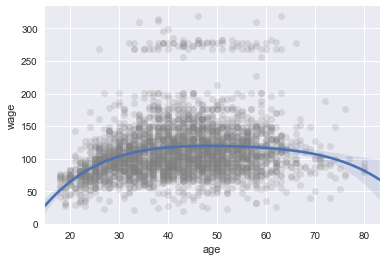

In [7]:
# Easy to plot higher polynomial order regressions from seaborn
sns.regplot(x='age', y='wage', data=wage, order=4, 
            scatter_kws={'alpha': 0.2, 'color': 'gray', 'facecolor': None});

In [8]:
# ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

lin_reg_sm = ols(formula='wage ~ age + age_2 + age_3 + age_4 + age_5', data=wage).fit()
anova_sm = sm.stats.anova_lm(lin_reg_sm, typ=1) # Type 1 for compatibility with the book

anova_sm

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,1.998697e+05,199869.664970,125.444324,1.491111e-28
age_2,1.0,2.287860e+05,228786.010128,143.593107,2.367734e-32
age_3,1.0,1.575569e+04,15755.693664,9.888756,1.679213e-03
age_4,1.0,6.070152e+03,6070.152124,3.809813,5.104623e-02
age_5,1.0,1.282563e+03,1282.563017,0.804976,3.696820e-01
Residual,2994.0,4.770322e+06,1593.293816,NaN,NaN


In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=True, C=1e9)
log_reg.fit(X, wage.wage_250)

log_reg.intercept_, log_reg.coef_

(array([-5.6498841e-05]),
 array([[-1.12834480e-03, -1.60767970e-02,  5.10936262e-04,
         -4.28423077e-06]]))

In [10]:
from statsmodels.formula.api import glm

lr_sm = glm(formula='wage_250 ~ age + age_2 + age_3 + age_4', 
            data=wage,
            family=sm.families.Binomial(sm.families.links.logit)).fit()

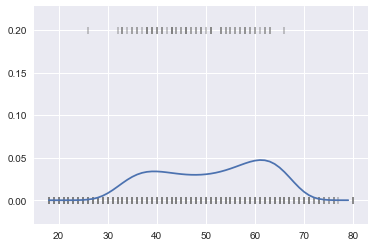

In [11]:
age_grid = np.arange(wage.age.min(), wage.age.max()).reshape(-1,1)

X_test = pd.DataFrame(PolynomialFeatures(4, include_bias=True).fit_transform(age_grid),
                      columns=['Intercept', 'age', 'age_2', 'age_3', 'age_4'])

log_reg_pred = lr_sm.predict(X_test)

plt.scatter(wage.age, wage.wage_250/5, marker='|', color='gray', alpha=0.5)
plt.plot(age_grid, log_reg_pred);

In [12]:
age_step, bins = pd.cut(wage.age, 4, retbins=True, right=True) 
#동일길이로 나누어 범주 만들기
bins

array([17.938, 33.5  , 49.   , 64.5  , 80.   ])

In [13]:
wage_step = pd.concat([wage.age, age_step, wage.wage, wage.wage_250], 
                      keys=['age', 'age_step', 'wage', 'wage_250'], 
                      axis=1) #합체

X = pd.get_dummies(wage_step.age_step)
X = X.drop(X.columns[0], axis=1)
y = wage_step.wage

In [14]:
X.dtypes

(33.5, 49.0]    uint8
(49.0, 64.5]    uint8
(64.5, 80.0]    uint8
dtype: object

In [15]:
y.dtypes

dtype('float64')

In [18]:
#pip install pandas==0.23.2
#피팅할때 타입에러가 났는데, 판다스 다운그레이드하면 해결된다고 해서 받고 다시 돌렸슴다

In [24]:
lr_step = LinearRegression(fit_intercept=True)

lr_step.fit(X, y)
lr_step.intercept_, lr_step.coef_

(94.158392033519, array([24.05349138, 23.664559  ,  7.6405917 ]))

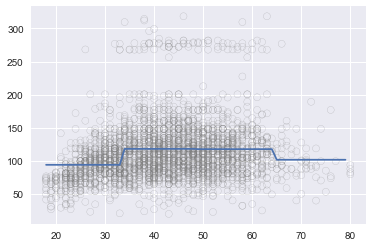

In [25]:
age_grid_bins = np.digitize(age_grid.ravel(), bins)

X_test = pd.get_dummies(age_grid_bins).drop(1, axis=1)

lin_pred = lr_step.predict(X_test)

plt.scatter(wage_step.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, lin_pred);

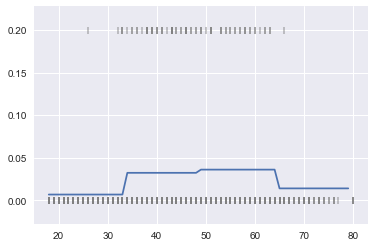

In [26]:
from statsmodels.formula.api import GLM

lr_sm = GLM(wage_step.wage_250, sm.add_constant(X),
            family=sm.families.Binomial(sm.families.links.logit)).fit()

log_pred = lr_sm.predict(sm.add_constant(X_test))

plt.scatter(wage_step.age, wage_step.wage_250/5, marker='|', color='gray', alpha=0.5)
plt.plot(age_grid, log_pred);

## 7.8.2 Splines

In [27]:
#Cubic Spline with specified knots
from patsy import dmatrix

age_spline1 = dmatrix('bs(age, knots=(25,40,60), degree=3, include_intercept=False)',
                     data=wage,
                     return_type='dataframe')

age_grid_spline1 = dmatrix('bs(age_grid, knots=(25,40,60), degree=3, include_intercept=False)',
                           {'age_grid': age_grid},
                           return_type='dataframe')

spline_reg1 = LinearRegression(fit_intercept=False)
spline_reg1.fit(age_spline1, wage.wage)

spline_pred1 = spline_reg1.predict(age_grid_spline1)

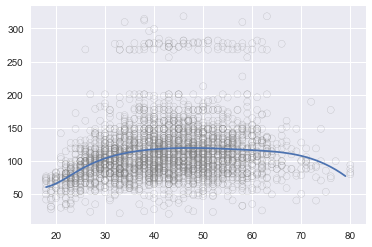

In [31]:
plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, spline_pred1);

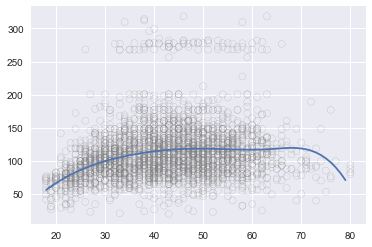

In [32]:
# Cubic spline with specified degrees of freedom
age_spline2 = dmatrix('bs(age, df=6, include_intercept=False)',
                     data=wage,
                     return_type='dataframe')

age_grid_spline2 = dmatrix('bs(age_grid, df=6, include_intercept=False)',
                           {'age_grid': age_grid},
                           return_type='dataframe')

spline_reg2 = LinearRegression(fit_intercept=False)
spline_reg2.fit(age_spline2, wage.wage)

spline_pred2 = spline_reg2.predict(age_grid_spline2)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, spline_pred2);

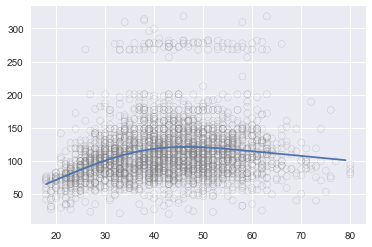

In [33]:
# Natural Spline
age_spline3 = dmatrix('cr(age, df=4)',
                     data=wage,
                     return_type='dataframe')

age_grid_spline3 = dmatrix('cr(age_grid, df=4)',
                           {'age_grid': age_grid},
                           return_type='dataframe')

spline_reg3 = LinearRegression(fit_intercept=False)
spline_reg3.fit(age_spline3, wage.wage)

spline_pred3 = spline_reg3.predict(age_grid_spline3)

plt.scatter(wage.age, wage.wage, marker='o', color='gray', alpha=0.5, facecolor='None')
plt.plot(age_grid, spline_pred3);

# 7.8.3 GAMs

In [34]:
year_spl = dmatrix('cr(year, df=4)',
                   data=wage,
                   return_type='dataframe').drop('Intercept', axis=1)

age_spl = dmatrix('cr(age, df=5)',
                  data=wage,
                  return_type='dataframe').drop('Intercept', axis=1)

edu_gam = pd.get_dummies(wage.education).iloc[:, 1:]


wage_gam = pd.concat([wage.wage, year_spl, age_spl, edu_gam], axis=1)

In [39]:
wage_gam.head(10)

,wage,"cr(year, df=4)[0]","cr(year, df=4)[1]","cr(year, df=4)[2]","cr(year, df=4)[3]","cr(age, df=5)[0]","cr(age, df=5)[1]","cr(age, df=5)[2]","cr(age, df=5)[3]","cr(age, df=5)[4]",2. HS Grad,3. Some College,4. College Grad,5. Advanced Degree
231655,75.043154,-0.075,0.575,0.575,-0.075,1.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0
86582,70.476020,0.400,0.725,-0.150,0.025,0.510027,0.603840,-0.143360,0.034435,-0.004941,0,0,1,0
161300,130.982177,1.000,0.000,0.000,0.000,-0.030933,0.193600,0.921600,-0.098384,0.014118,0,1,0,0
155159,154.685293,1.000,0.000,0.000,0.000,-0.053004,0.355062,0.801975,-0.121462,0.017429,0,0,1,0
11443,75.043154,0.000,1.000,0.000,0.000,0.013156,-0.078937,0.966712,0.115269,-0.016200,1,0,0,0
376662,127.115744,0.025,-0.150,0.725,0.400,0.021707,-0.130240,0.736960,0.423103,-0.051529,0,0,1,0
450601,169.528538,0.000,0.000,0.000,1.000,-0.042226,0.272316,0.867180,-0.113567,0.016296,0,1,0,0
377954,111.720849,0.025,-0.150,0.725,0.400,0.122880,0.974720,-0.122880,0.029515,-0.004235,0,1,0,0
228963,118.884359,-0.075,0.575,0.575,-0.075,-0.070611,0.525294,0.647269,-0.119033,0.017081,0,1,0,0
81404,128.680488,0.400,0.725,-0.150,0.025,0.019976,-0.119854,0.873786,0.260794,-0.034702,1,0,0,0


In [40]:
X = wage_gam.iloc[:, 1:14]
y = wage_gam.wage

In [41]:
gam = LinearRegression(fit_intercept=True)
gam.fit(X, y)

gam.intercept_, gam.coef_

(75.40855392027856,
 array([-4.43395136e+00, -3.03043899e-02,  1.58046315e+00,  2.88379259e+00,
        -2.95110484e+01,  8.20753750e+00,  1.70035897e+01,  1.19661833e+01,
        -7.66626210e+00,  1.07857906e+01,  2.31820289e+01,  3.78598409e+01,
         6.23017265e+01]))